<a href="https://colab.research.google.com/github/AhmadAlsaadi/ENCH421/blob/main/chapter%2011.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg"  alt="Description" style="float: left; margin-right: 10px;">
</a>

# Chapter 11: Dynamic Behavior and Stability of Closed-Loop Control Systems

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from control import TransferFunction, feedback
from ipywidgets import interact

## 1.4 STABILITY OF CLOSED-LOOP CONTROL SYSTEMS

**Example 11.4**

<div style="display:flex">
    <div>
Consider the feedback control system shown in Fig. 11.8<br>
with the following transfer functions:<br>   
Gc = Kc<br>         
$Gv = \large{\frac{1}{2s + 1}}$ <br>   
$Gp = Gd = \large{\frac{1}{5s + 1}}$ <br>   
$Gm = \large{\frac{1}{s + 1}}$<br>       
Show that the closed-loop system produces unstable<br>
responses if controller gain Kc is too large.
    </div>
    <div>
        <img width="80%" src="images/11-8.jpg">
    </div>
</div>

In [125]:
@interact
def process(Kc=(0,20,.1)):
    Km=1
    Gc = Kc
    Gv = TransferFunction([1],[2,1])
    Gp = TransferFunction([1],[5,1])
    Gd = TransferFunction([1],[5,1])
    Gm = TransferFunction([1],[1,1])
    
    closed_loop = feedback(Km*Gc*Gv*Gp,Gm)
    
    # Time vector
    t = np.linspace(0, 20, 200)
   
    # Step response of the closed-loop system
    t, y = control.step_response(closed_loop, T=t)
    
    # Plot the results
    plt.figure()
    plt.plot(t, y) 
    plt.title('Step Response of a Closed-Loop System with Proportional Control')
    plt.xlabel('Time [s]')
    plt.ylabel('Output')
    plt.ylim([-2,4])
    plt.show()

interactive(children=(FloatSlider(value=10.0, description='Kc', max=20.0), Output()), _dom_classes=('widget-in…

**Example 11.7**

Consider the feedback control system in Example 11.4, but   
now assume that Gm = 1. Determine the range of Kc values   
that result in a stable closed-loop system.

In [126]:
@interact
def process2(Kc=(-5,20,.1)):
    Km=1
    Gc = Kc
    Gv = TransferFunction([1],[2,1])
    Gp = TransferFunction([1],[5,1])
    Gd = TransferFunction([1],[5,1])
    Gm = TransferFunction([1],[1])
    
    closed_loop = feedback(Km*Gc*Gv*Gp,Gm)

    # Time vector
    t = np.linspace(0, 200, 200)
   
    # Step response of the closed-loop system
    t, y = control.step_response(closed_loop, T=t)
    
    # Plot the results
    plt.figure()
    plt.plot(t, y) 
    plt.title('Step Response of a Closed-Loop System with Proportional Control')
    plt.xlabel('Time [s]')
    plt.ylabel('Output')
    plt.show()

interactive(children=(FloatSlider(value=7.0, description='Kc', max=20.0, min=-5.0), Output()), _dom_classes=('…

**Example 11.8**

Consider a process, $Gp = \large{\frac{0.2}{(−s + 1)}}$
that is open-loop
unstable.   
If Gv = Gm = 1, determine whether a proportional controller can stabilize the closed-loop system.

In [131]:
@interact
def process3(Kc=(-10,5,.1)):
    Gc = Kc
    Gp = TransferFunction([0.2],[-1,1])
    Gv = TransferFunction([1],[1])
    Gm = TransferFunction([1],[1])
    
    closed_loop = feedback(Gc*Gv*Gp,Gm)

    # Time vector
    t = np.linspace(0, 200, 200)
   
    # Step response of the closed-loop system
    t, y = control.step_response(closed_loop, T=t)
    
    # Plot the results
    plt.figure()
    plt.plot(t, y) 
    plt.title('Step Response of a Closed-Loop System with Proportional Control')
    plt.xlabel('Time [s]')
    plt.ylabel('Output')
    plt.show()

interactive(children=(FloatSlider(value=-3.0, description='Kc', max=5.0, min=-10.0), Output()), _dom_classes=(…

### 11.4.3 Direct Substitution Method

**Example 11.9**

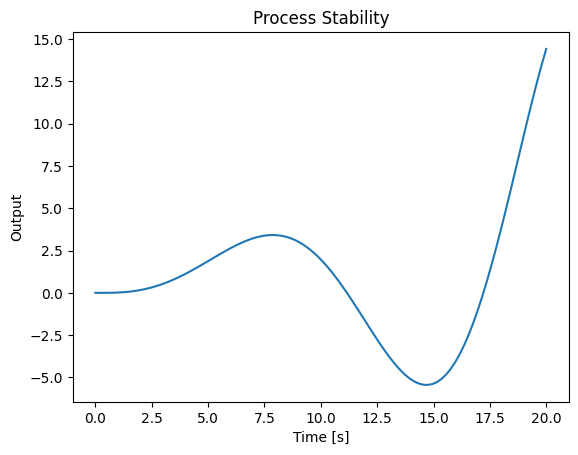

In [93]:
    p=control.TransferFunction([1],[1,5,3,0,1])
    # Step response of the closed-loop system
    t, y = control.step_response(p, T=t)
    
    # Plot the results
    plt.figure()
    plt.plot(t, y) 
    plt.title('Process Stability')
    plt.xlabel('Time [s]')
    plt.ylabel('Output')
    plt.show()

**Example 11.10**

Find the values of controller gain Kc that make the feed￾back control system of Example 11.4 stable. Use the direct
substitution method to determine Kcm for the system.

For the modeling of this example see example 11.4

**Example 11.11**

Consider a feedback control system with:    
Gc = Kc    
Gv = 2   
Gm = 0.25   
$Gp = \large{\frac{4^{e−s}}{5s + 1}}$   
Find Kcm using direct substitution.

In [123]:
@interact
def process3(Kc=(0,5,.1)):
    Gc = Kc
    Gv = TransferFunction([2],[1])
    Gm = TransferFunction([0.25],[1])
    Gp = TransferFunction([4],[5,1])
    
    # Pade approximate to the delay function:
    #
    
    num,den = control.pade(1,10)
    
    delay = control.TransferFunction(num,den)
    closed_loop = feedback(Gc*Gv*Gp*delay,Gm)

    # Time vector
    t = np.linspace(0, 100, 200)
   
    # Step response of the closed-loop system
    t, y = control.step_response(closed_loop, T=t)
    
    # Plot the results
    plt.figure()
    plt.plot(t, y) 
    plt.title('Step Response of a Closed-Loop System with Proportional Control')
    plt.xlabel('Time [s]')
    plt.ylabel('Output')
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='Kc', max=5.0), Output()), _dom_classes=('widget-inte…